In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import graphviz
import pydotplus
import io
from scipy import misc
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression

In [299]:
df = pd.read_csv(os.path.join("allgenres.csv"))
df.head()

,ID,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,new_genres
0,26807,Yhung T.O.,0.302000,0.811,206593.0,0.574,0.000000,0.0865,-7.003,0.180,96.993,0.546,60.0,5,0,1,"['cali rap', 'west coast trap']",rap
1,9250,Grieves,0.042100,0.592,185373.0,0.509,0.000000,0.0814,-6.685,0.375,180.121,0.631,44.0,11,1,2,"['abstract hip hop', 'indie pop rap', 'undergr...",rap
2,15653,Mark Battles,0.209000,0.745,185487.0,0.741,0.000000,0.5100,-7.212,0.184,94.002,0.480,57.0,2,1,2,"['canadian hip hop', 'deep underground hip hop...",rap
3,5271,DJ Jazzy Jeff,0.029000,0.782,250200.0,0.639,0.000000,0.1970,-8.154,0.365,95.116,0.487,47.0,1,1,1,"['gangster rap', 'hip hop', 'old school hip ho...",rap
4,25090,Tion Wayne,0.000415,0.572,169355.0,0.519,0.000023,0.1290,-8.054,0.243,100.453,0.704,77.0,10,0,2,"['london rap', 'uk hip hop']",rap


In [300]:
len(df)

1000

In [303]:
secondarygenres = df.drop(["ID","artists","count","genres","popularity"],axis=1)
secondarygenres.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,new_genres
0,0.302000,0.811,206593.0,0.574,0.000000,0.0865,-7.003,0.180,96.993,0.546,5,0,rap
1,0.042100,0.592,185373.0,0.509,0.000000,0.0814,-6.685,0.375,180.121,0.631,11,1,rap
2,0.209000,0.745,185487.0,0.741,0.000000,0.5100,-7.212,0.184,94.002,0.480,2,1,rap
3,0.029000,0.782,250200.0,0.639,0.000000,0.1970,-8.154,0.365,95.116,0.487,1,1,rap
4,0.000415,0.572,169355.0,0.519,0.000023,0.1290,-8.054,0.243,100.453,0.704,10,0,rap


In [304]:
# assign x and y 
X = secondarygenres.drop("new_genres", axis =1)
y = secondarygenres['new_genres']
print(X.shape, y.shape)

(1000, 12) (1000,)


In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [306]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled1 = X_Scaler.transform(X_train)
X_test_scaled1 = X_Scaler.transform(X_test)

In [307]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=10, solver= 'newton-cg')
classifier

LogisticRegression(C=10, solver='newton-cg')

In [308]:
classifier.fit(X_train,y_train)

C:\Users\bvera\anaconda3\envs\PythonAdv\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bvera\anaconda3\envs\PythonAdv\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bvera\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=10, solver='newton-cg')

In [309]:
print(classifier.score(X_train,y_train))
print(classifier.score(X_test,y_test))

0.524
0.436


In [310]:
predictions = classifier.predict(cleaned_data)
print(predictions)

['rap' 'rap' 'rap' 'latin' 'rap' 'rap' 'r&b' 'rap' 'latin' 'rap' 'edm'
 'rap' 'rap' 'latin' 'r&b' 'alternative' 'metal' 'christian' 'rap' 'rap'
 'rap' 'r&b' 'latin' 'rap' 'christian' 'rap' 'rap' 'edm' 'r&b' 'r&b' 'rap'
 'rap' 'r&b' 'rap' 'rap' 'edm' 'metal' 'rap' 'rap' 'rap' 'edm' 'rap' 'edm'
 'edm' 'rap' 'edm' 'rap' 'rap' 'rap' 'latin' 'rap' 'rap' 'country' 'rap'
 'edm' 'rap' 'rap' 'rap' 'rap' 'r&b' 'rap' 'rap' 'edm' 'rap' 'rap' 'latin'
 'rap' 'r&b' 'rap' 'rap' 'rap' 'latin' 'rap' 'rap' 'rap' 'rap' 'rap' 'rap'
 'rap' 'r&b' 'country' 'metal' 'rap' 'rap' 'jazz' 'country' 'rap' 'latin'
 'rap' 'edm' 'country' 'metal' 'latin' 'rap' 'rap' 'rap' 'rap' 'rap' 'rap'
 'r&b' 'classical' 'classical' 'classical' 'classical' 'classical'
 'christian' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'edm' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'jazz' 'classical' 'classical' 'classical

In [311]:
predictions = classifier.predict(X_test)
pd.DataFrame(predictions, y_test)

,0
new_genres,
alternative,metal
latin,country
r&b,edm
edm,rap
christian,r&b
...,...
edm,edm
latin,country
r&b,r&b


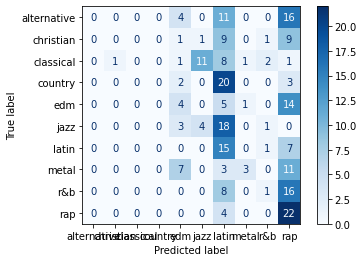

In [321]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test_scaled1, y_test, cmap=plt.cm.Blues)

plt.show()

In [313]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

# def show_tree(tree, features, path):
#     f = io.StringIO()
#     export_graphviz(tree, out_file=f, feature_names=features)
#     pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
#     img = misc.imread(path)
#     plt.rcParams["figure.figsize"] = (20,20)
#     plt.imShoww(img)

In [314]:
# show_tree(clf, features, "dec_tree.png")

# Decision Tree and Random Forest

In [315]:
# decision tree accuracy 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.324

In [328]:
print(f"Training Data Score: {clf.score(X_train_scaled1, y_train)}")
print(f"Testing Data Score: {clf.score(X_train_scaled1, y_test)}")

Training Data Score: 0.444


ValueError: Found input variables with inconsistent numbers of samples: [250, 750]

In [316]:
# random forest accuracy
rf = RandomForestClassifier(n_estimators=450, max_depth= 10, min_samples_leaf= 1, min_samples_split= 5)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.492

In [317]:
# the last 6 figures appear to be the least important of all features. could be
# useful to drop these?
sorted(zip(rf.feature_importances_, features), reverse=True)

[(0.12942842842027197, 'acousticness'),
 (0.1239542421944789, 'danceability'),
 (0.1113414359787796, 'valence'),
 (0.11015082382936894, 'energy'),
 (0.10704037050503247, 'instrumentalness'),
 (0.10427582688883866, 'speechiness'),
 (0.0970390504168449, 'loudness'),
 (0.06412829255635404, 'duration_ms'),
 (0.05560987136205321, 'tempo'),
 (0.05393183689787396, 'liveness'),
 (0.02990875995087272, 'key'),
 (0.013191060999230777, 'mode')]

In [318]:
# RandomForest Predictions
RFpredictions = rf.predict(X_test)
RFlist = pd.DataFrame({'predictions': RFpredictions, 'actual': y_test})
RFlist.head(20)

,predictions,actual
507,metal,alternative
818,r&b,latin
452,edm,r&b
368,rap,edm
242,country,christian
929,christian,jazz
262,christian,christian
810,r&b,latin
318,r&b,edm
49,rap,rap


# Classification Report for Random Forest

In [37]:
# performance(christian genre) is the poorest with trap as a runner up
# "here we decided to run a classification report to verify the precision for each genre just to 
# have a clearer idea on which genres were giving us the most issue(potentially remove them)"

# what is the recall and the f1 score?

# precision is the true positive divided by the correct prediction and the false positive

# recall is the true positive divided by correct prediction and the incorrect prediction

# f1 score accounts for the precision and the recall

from sklearn.metrics import classification_report

print(classification_report(y_test, RFpredictions, target_names = ['salsa','house','performance','alternative metal', "texas country", 'trap', 'cool jazz']))

                   precision    recall  f1-score   support

            salsa       0.84      0.76      0.80        21
            house       0.82      0.88      0.85        26
      performance       0.50      0.50      0.50        16
alternative metal       0.91      0.84      0.87        25
    texas country       0.83      0.79      0.81        24
             trap       0.67      0.83      0.74        29
        cool jazz       0.87      0.76      0.81        34

         accuracy                           0.78       175
        macro avg       0.78      0.77      0.77       175
     weighted avg       0.79      0.78      0.78       175



In [18]:
len(X_train)

525

In [19]:
len(X_test)

175

# Deep Neural Network

In [190]:
X = secondarygenres.drop("secondary_genres", axis=1)
y = secondarygenres["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [191]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [192]:
# for i in [0, round (len(y)/2), len (y)-1]:
#     print(i)
#     print(y[i])
#     print(encoded_y[i])
#     print('-' * 35)

In [193]:
# from keras.utils import to_categorical

# one_hot_y = to_categorical(encoded_y)

# one_hot_y[:2]

In [194]:
# for i in [0, round (len(y)/2), len (y)-1]:
#     print(i)
#     print(y[i])
#     print(encoded_y[i])
#     print(one_hot_y[i])
#     print('-' * 35)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [196]:
X_train.shape
y_train.shape

(525,)

In [197]:
X_test.shape
y_test.shape

(175,)

In [198]:
from sklearn.preprocessing import StandardScaler



In [199]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [200]:
from tensorflow.keras.utils import to_categorical

In [201]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [202]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [203]:
from tensorflow.keras.models import Sequential 

model = Sequential()

In [204]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=36, activation = 'relu', input_dim=12))
model.add(Dense(units = 7, activation='softmax'))

In [205]:

model.compile(optimizer='adam',
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])


In [206]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 36)                468       
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 259       
Total params: 727
Trainable params: 727
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    #batch_size=200,
    shuffle=True,
    verbose=2
)

Train on 525 samples
Epoch 1/60
525/525 - 0s - loss: 1.9100 - accuracy: 0.2057
Epoch 2/60
525/525 - 0s - loss: 1.7308 - accuracy: 0.3371
Epoch 3/60
525/525 - 0s - loss: 1.5963 - accuracy: 0.4324
Epoch 4/60
525/525 - 0s - loss: 1.4891 - accuracy: 0.4876
Epoch 5/60
525/525 - 0s - loss: 1.3982 - accuracy: 0.5448
Epoch 6/60
525/525 - 0s - loss: 1.3183 - accuracy: 0.5752
Epoch 7/60
525/525 - 0s - loss: 1.2448 - accuracy: 0.6038
Epoch 8/60
525/525 - 0s - loss: 1.1791 - accuracy: 0.6229
Epoch 9/60
525/525 - 0s - loss: 1.1201 - accuracy: 0.6419
Epoch 10/60
525/525 - 0s - loss: 1.0684 - accuracy: 0.6648
Epoch 11/60
525/525 - 0s - loss: 1.0217 - accuracy: 0.6819
Epoch 12/60
525/525 - 0s - loss: 0.9802 - accuracy: 0.7029
Epoch 13/60
525/525 - 0s - loss: 0.9426 - accuracy: 0.7162
Epoch 14/60
525/525 - 0s - loss: 0.9083 - accuracy: 0.7257
Epoch 15/60
525/525 - 0s - loss: 0.8792 - accuracy: 0.7333
Epoch 16/60
525/525 - 0s - loss: 0.8523 - accuracy: 0.7524
Epoch 17/60
525/525 - 0s - loss: 0.8275 - ac

In [215]:
deep_model = Sequential()
deep_model.add(Dense(units=36, activation='relu', input_dim=12))
deep_model.add(Dense(units=24, activation='relu'))
deep_model.add(Dense(units=12, activation='relu'))
deep_model.add(Dense(units=7, activation='softmax'))

In [216]:
deep_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 36)                468       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                888       
_________________________________________________________________
dense_17 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 91        
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [217]:
deep_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    #batch_size=200,
    shuffle=True,
    verbose=2
)

Train on 525 samples
Epoch 1/200
525/525 - 0s - loss: 1.9123 - accuracy: 0.1752
Epoch 2/200
525/525 - 0s - loss: 1.8064 - accuracy: 0.2762
Epoch 3/200
525/525 - 0s - loss: 1.7148 - accuracy: 0.3429
Epoch 4/200
525/525 - 0s - loss: 1.6245 - accuracy: 0.4324
Epoch 5/200
525/525 - 0s - loss: 1.5079 - accuracy: 0.5619
Epoch 6/200
525/525 - 0s - loss: 1.3853 - accuracy: 0.6171
Epoch 7/200
525/525 - 0s - loss: 1.2561 - accuracy: 0.6457
Epoch 8/200
525/525 - 0s - loss: 1.1386 - accuracy: 0.6781
Epoch 9/200
525/525 - 0s - loss: 1.0347 - accuracy: 0.7219
Epoch 10/200
525/525 - 0s - loss: 0.9469 - accuracy: 0.7352
Epoch 11/200
525/525 - 0s - loss: 0.8753 - accuracy: 0.7448
Epoch 12/200
525/525 - 0s - loss: 0.8198 - accuracy: 0.7505
Epoch 13/200
525/525 - 0s - loss: 0.7711 - accuracy: 0.7676
Epoch 14/200
525/525 - 0s - loss: 0.7383 - accuracy: 0.7695
Epoch 15/200
525/525 - 0s - loss: 0.7038 - accuracy: 0.7829
Epoch 16/200
525/525 - 0s - loss: 0.6837 - accuracy: 0.7752
Epoch 17/200
525/525 - 0s - 

Epoch 137/200
525/525 - 0s - loss: 0.1654 - accuracy: 0.9581
Epoch 138/200
525/525 - 0s - loss: 0.1598 - accuracy: 0.9562
Epoch 139/200
525/525 - 0s - loss: 0.1581 - accuracy: 0.9619
Epoch 140/200
525/525 - 0s - loss: 0.1590 - accuracy: 0.9581
Epoch 141/200
525/525 - 0s - loss: 0.1578 - accuracy: 0.9600
Epoch 142/200
525/525 - 0s - loss: 0.1529 - accuracy: 0.9619
Epoch 143/200
525/525 - 0s - loss: 0.1510 - accuracy: 0.9619
Epoch 144/200
525/525 - 0s - loss: 0.1520 - accuracy: 0.9619
Epoch 145/200
525/525 - 0s - loss: 0.1482 - accuracy: 0.9600
Epoch 146/200
525/525 - 0s - loss: 0.1484 - accuracy: 0.9638
Epoch 147/200
525/525 - 0s - loss: 0.1476 - accuracy: 0.9543
Epoch 148/200
525/525 - 0s - loss: 0.1472 - accuracy: 0.9638
Epoch 149/200
525/525 - 0s - loss: 0.1435 - accuracy: 0.9619
Epoch 150/200
525/525 - 0s - loss: 0.1424 - accuracy: 0.9600
Epoch 151/200
525/525 - 0s - loss: 0.1411 - accuracy: 0.9657
Epoch 152/200
525/525 - 0s - loss: 0.1397 - accuracy: 0.9600
Epoch 153/200
525/525 - 

In [218]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(model_loss, model_accuracy)

175/175 - 0s - loss: 0.8620 - accuracy: 0.7714
0.8619845873968942 0.7714286


In [219]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(model_loss, model_accuracy)

175/175 - 0s - loss: 1.5863 - accuracy: 0.6743
1.5862619951793127 0.6742857


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



# SVM Classifier

In [58]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# KNN

In [ ]:
# KNN
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
train_scores = []
test_scores = []
for k in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, train/test score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled,y_train)
print(knn.score(X_test_scaled, y_test))

In [ ]:
X_test.iloc[0]

In [ ]:
X_test_scaled[0]

In [ ]:
for x in X_test_scaled:
    print(knn.predict([x]))

In [ ]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [ ]:
# binary classification
from sklearn.metrics import classification_report 

print(classification_report(y_test,predictions))

In [ ]:
pipeline_dt = Pipeline([('scalar1', StandardScaler()),
                    ('pca1',PCA(n_components=2)),
                    ('lr_classifier',LogisticRegression())])

In [ ]:
pipeline_rf = Pipeline([('scalar2', StandardScaler()),
                    ('pca2',PCA(n_components=2)),
                    ('lr_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_knn = Pipeline([('scalar3', StandardScaler()),
                    ('pca3',PCA(n_components=2)),
                    ('lr_classifier',RandomForestClassifier())])

In [ ]:
pipelines = [pipeline_dt, pipeline_rf, pipeline_knn]

In [ ]:
best_accuracy = 0.0
best_classifier=0
best_pipeline=""

In [ ]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

In [ ]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:

best_model.score(X_test,y_test)

In [ ]:
# Gridsearch via SVM
# from sklearn.svm import SVC
# model = SVC(kernel='linear')
# model

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C':[1,5,10,50],
#             'gamma': [0.0001, 0.0005, 0.001, 0.005]}

# grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_score)

In [ ]:
gridpredictions = grid.predict(X_test)

In [ ]:
# should we mention what these features are?

In [ ]:
# we should attempt pipeline and n_jobs / gridsearch
# reducing the columns we are using to attempt a higher accuracy


In [ ]:
#  (0.04888157126179538, 'duration_ms'),
#  (0.043915717257736984, 'tempo'),
#  (0.03734735314898238, 'liveness'),
#  (0.011619048542549717, 'mode')]

In [ ]:
# reduction = secondarygenres.drop(["duration_ms","tempo","liveness","key","mode", "energy", "speechiness","instrumentalness"],axis=1)
# reduction.head()

In [ ]:
# target = reduction['secondary_genres']

In [ ]:
# cleaned_data = reduction.drop('secondary_genres', axis=1)
# features = cleaned_data.columns
# cleaned_data.head()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [ ]:
# len(X_train)

In [ ]:
# decision tree again
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# random forest accuracy again
# rf = RandomForestClassifier(n_estimators=700)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# sorted(zip(rf.feature_importances_, features), reverse=True)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

# plt.show()

In [ ]:
# reduced again by the energy, speechiness and instrumentalness and it 
# made the data less accurate by 1 percent. 